In [ ]:
import keras
from keras import layers
from PIL import Image
from IPython.core.display import Path
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/imbikramsaha/cat-breeds")


100%|██████████| 208M/208M [00:08<00:00, 25.6MB/s]


In [ ]:
def Split_Preprocessing(path_train, path_test,num_train=200,num_test=10):
    train = list()
    test = list()
    # iterate over files in
    # that directory
    files = Path(path_train).glob('*')
    # print('------------------train images---------------')
    for i,file in enumerate(files):
        if(i==num_train):
          break
        im = Image.open(file)
        im = im.resize(size=(128,128))
        na = np.array(im)
        if len(na.shape) == 3:
          if na.shape[2] == 3:
            train.append(na)

    # print("===================test images=====================")
    files = Path(path_test).glob('*')
    for i,file in enumerate(files):
        if(i==num_test):
          break
        im = Image.open(file)
        im = im.resize(size=(128,128))
        # plt.imshow(im)
        na = np.array(im)
        if len(na.shape) == 3:
          if na.shape[2] == 3:
            test.append(na)

    return np.array(train), np.array(test)
train, test =Split_Preprocessing('/content/cat-breeds/cats-breads/Bombay','/content/test')

In [ ]:
train = train.astype('float32') / 255
test = test.astype('float32') / 255

In [ ]:
train.shape

(200, 128, 128, 3)

In [ ]:
noiseOFtrain = np.random.normal(loc=0.0, scale=0.25, size=train.shape)
noiseOFtest = np.random.normal(loc=0.0, scale=0.25, size=test.shape)

noisy_train = train + noiseOFtrain
noisy_test = test + noiseOFtest

noisy_train = np.clip(noisy_train, 0., 1.)
noisy_test = np.clip(noisy_test, 0., 1.)

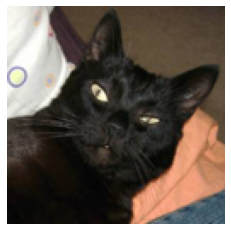

In [ ]:
plt.axis("off")
plt.imshow((train[0]))
plt.show()

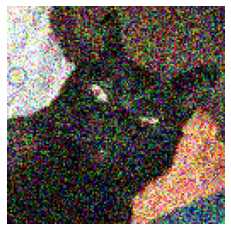

In [ ]:
plt.axis("off")
plt.imshow((noisy_train[0]))
plt.show()

##**Autoencoder1**

In [ ]:
input_img_ = keras.Input(shape=(128, 128, 3))
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img_)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D()(x)

encoded_ = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)


# at this point the representation is (16*16*128) i.e. 128-dimensional



x = layers.Conv2DTranspose(128,3, strides=(2,2), padding="same",activation="relu")(encoded_)
x = layers.Conv2DTranspose(128,3, strides=(2,2), padding="same",activation="relu")(x)
x = layers.Conv2DTranspose(64,3, strides=(2,2), padding="same",activation="relu")(x)
decoded_ = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder_ = keras.Model(input_img_, decoded_)


autoencoder_.compile(optimizer='adam', loss='mse')
autoencoder_.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       147584

In [ ]:

history = autoencoder_.fit(noisy_train, train, epochs=100, validation_data=(noisy_test, test))

Epoch 1/100
7/7 [==============================] - 12s 263ms/step - loss: 0.1014 - val_loss: 0.1165
Epoch 2/100
7/7 [==============================] - 1s 90ms/step - loss: 0.0912 - val_loss: 0.1157
Epoch 3/100
7/7 [==============================] - 1s 90ms/step - loss: 0.0560 - val_loss: 0.0961
Epoch 4/100
7/7 [==============================] - 1s 90ms/step - loss: 0.0440 - val_loss: 0.0540
Epoch 5/100
7/7 [==============================] - 1s 91ms/step - loss: 0.0286 - val_loss: 0.0351
Epoch 6/100
7/7 [==============================] - 1s 90ms/step - loss: 0.0255 - val_loss: 0.0321
Epoch 7/100
7/7 [==============================] - 1s 89ms/step - loss: 0.0219 - val_loss: 0.0281
Epoch 8/100
7/7 [==============================] - 1s 90ms/step - loss: 0.0184 - val_loss: 0.0264
Epoch 9/100
7/7 [==============================] - 1s 90ms/step - loss: 0.0165 - val_loss: 0.0251
Epoch 10/100
7/7 [==============================] - 1s 91ms/step - loss: 0.0155 - val_loss: 0.0239
Epoch 11/100
7/7 

In [ ]:
decoded_imgs_1 = autoencoder_.predict(noisy_test)

1/1 [==============================] - 0s 117ms/step


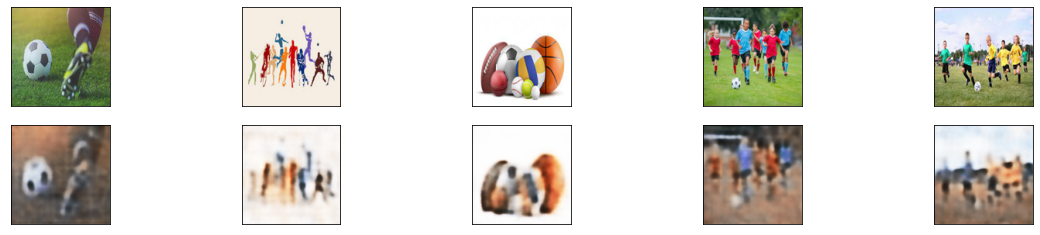

In [ ]:
import matplotlib.pyplot as plt

n = 5
plt.figure(figsize=(20, 4))
for i in range(0, n ):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n + 1 )
    plt.imshow(np.clip(decoded_imgs_1[i], 0., 1.))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
encoder_ = keras.Model(input_img_, encoded_)

encoded_input_ = keras.Input(shape=(16, 16, 128))
x = layers.Conv2DTranspose(128,3, strides=(2,2), padding="same",activation="relu")(encoded_input_)
x = layers.Conv2DTranspose(128,3, strides=(2,2), padding="same",activation="relu")(x)
x = layers.Conv2DTranspose(64,3, strides=(2,2), padding="same",activation="relu")(x)
last_ = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)


decoder_ = keras.Model(encoded_input_, last_)
decoder_.compile(optimizer='adam', loss='MSE')
decoder_.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 16, 16, 128)]     0         
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 32, 32, 128)      147584    
 ranspose)                                                       
                                                                 
 conv2d_transpose_4 (Conv2DT  (None, 64, 64, 128)      147584    
 ranspose)                                                       
                                                                 
 conv2d_transpose_5 (Conv2DT  (None, 128, 128, 64)     73792     
 ranspose)                                                       
                                                                 
 conv2d_5 (Conv2D)           (None, 128, 128, 3)       1731      
                                                           

In [ ]:
k = 0
for i in range(8,16):
    decoder_.weights[k].assign(autoencoder_.weights[i])
    k = k+1

In [ ]:
encoded_imgs = encoder_.predict(test)

noiseOFencoded_imgs = np.random.normal(loc=0.0, scale=0.1, size=encoded_imgs.shape)
noisy_encoded_imgs = encoded_imgs + noiseOFencoded_imgs
noisy_encoded_imgs = np.clip(noisy_encoded_imgs, 0., 1.)

decoded_imgs__1 = decoder_.predict(noisy_encoded_imgs)

1/1 [==============================] - 0s 82ms/step


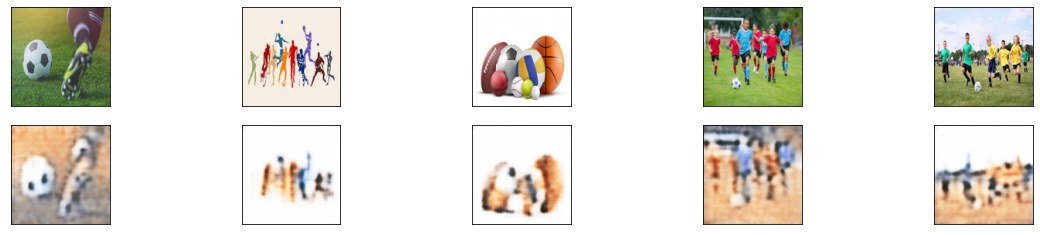

In [ ]:
n = 5  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs__1[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

##**Autoencoder2**

In [ ]:
input_img_2 = keras.Input(shape=(128, 128, 3))
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img_2)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D()(x)

encoded_2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)


# at this point the representation is (32*32*128) i.e. 128-dimensional

x = layers.Conv2DTranspose(128,3, strides=(2,2), padding="same",activation="relu")(encoded_2)
x = layers.Conv2DTranspose(64,3, strides=(2,2), padding="same",activation="relu")(x)
decoded_2= layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder_2 = keras.Model(input_img_2, decoded_2)


autoencoder_2.compile(optimizer='adam', loss='mse')
autoencoder_2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 128)       1475

In [ ]:
history1 = autoencoder_2.fit(noisy_train, train, epochs=100, validation_data=(noisy_test, test))

Epoch 1/100
7/7 [==============================] - 1s 112ms/step - loss: 0.0979 - val_loss: 0.0991
Epoch 2/100
7/7 [==============================] - 1s 88ms/step - loss: 0.0451 - val_loss: 0.0517
Epoch 3/100
7/7 [==============================] - 1s 88ms/step - loss: 0.0296 - val_loss: 0.0411
Epoch 4/100
7/7 [==============================] - 1s 88ms/step - loss: 0.0207 - val_loss: 0.0279
Epoch 5/100
7/7 [==============================] - 1s 87ms/step - loss: 0.0174 - val_loss: 0.0234
Epoch 6/100
7/7 [==============================] - 1s 88ms/step - loss: 0.0148 - val_loss: 0.0209
Epoch 7/100
7/7 [==============================] - 1s 88ms/step - loss: 0.0132 - val_loss: 0.0212
Epoch 8/100
7/7 [==============================] - 1s 89ms/step - loss: 0.0123 - val_loss: 0.0191
Epoch 9/100
7/7 [==============================] - 1s 88ms/step - loss: 0.0124 - val_loss: 0.0220
Epoch 10/100
7/7 [==============================] - 1s 89ms/step - loss: 0.0117 - val_loss: 0.0184
Epoch 11/100
7/7 [

In [ ]:
decoded_imgs_2 = autoencoder_2.predict(noisy_test)

1/1 [==============================] - 0s 86ms/step


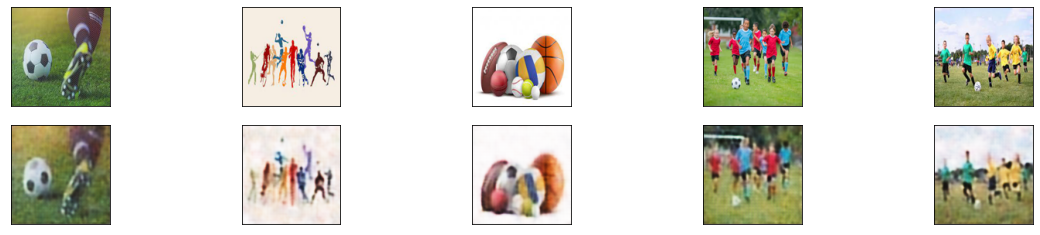

In [ ]:
import matplotlib.pyplot as plt

n = 5
plt.figure(figsize=(20, 4))
for i in range(0, n ):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n + 1 )
    plt.imshow(np.clip(decoded_imgs_2[i], 0., 1.))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
encoder_2 = keras.Model(input_img_2, encoded_2)

encoded_input_2 = keras.Input(shape=(32, 32, 128))
x = layers.Conv2DTranspose(128,3, strides=(2,2), padding="same",activation="relu")(encoded_input_2)
x = layers.Conv2DTranspose(64,3, strides=(2,2), padding="same",activation="relu")(x)
last_2= layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

decoder_2 = keras.Model(encoded_input_2, last_2)
decoder_2.compile(optimizer='adam', loss='mse')
decoder_2.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 128)]     0         
                                                                 
 conv2d_transpose_8 (Conv2DT  (None, 64, 64, 128)      147584    
 ranspose)                                                       
                                                                 
 conv2d_transpose_9 (Conv2DT  (None, 128, 128, 64)     73792     
 ranspose)                                                       
                                                                 
 conv2d_10 (Conv2D)          (None, 128, 128, 3)       1731      
                                                                 
Total params: 223,107
Trainable params: 223,107
Non-trainable params: 0
_________________________________________________________________


In [ ]:
k = 0
for i in range (6,10):
    decoder_2.weights[k].assign(autoencoder_2.weights[i])
    k = k+1

In [ ]:
encoded_imgs1 = encoder_2.predict(test)

noiseOFencoded_imgs1 = np.random.normal(loc=0.0, scale=0.1, size=encoded_imgs1.shape)
noisy_encoded_imgs1 = encoded_imgs1 + noiseOFencoded_imgs1
noisy_encoded_imgs1 = np.clip(noisy_encoded_imgs1, 0., 1.)

decoded_imgs__2 = decoder_2.predict(noisy_encoded_imgs1)

1/1 [==============================] - 0s 17ms/step


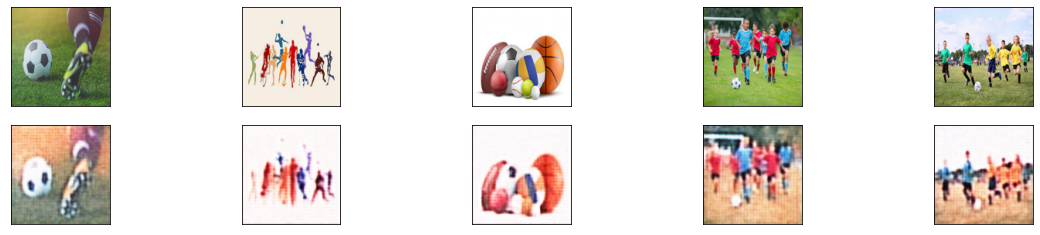

In [ ]:
n = 5  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs__2[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#**PCA Vs Autoencoder (without noise)**

In [ ]:
X = test[3]
X1 = X[:,:,0]
X2 = X[:,:,1]
X3 = X[:,:,2]

In [ ]:
X_meaned1 = X1 - np.mean(X1 , axis = 0)
X_meaned2 = X2 - np.mean(X2 , axis = 0)
X_meaned3 = X3 - np.mean(X3 , axis = 0)


In [ ]:
cov_mat1 = np.cov(X_meaned1 , rowvar = False)   # rowvar = False >> work with X_meaned as transposed
cov_mat2 = np.cov(X_meaned2 , rowvar = False)   # rowvar = False >> work with X_meaned as transposed
cov_mat3 = np.cov(X_meaned3 , rowvar = False)   # rowvar = False >> work with X_meaned as transposed

In [ ]:
eigen_values1 , eigen_vectors1 = np.linalg.eigh(cov_mat1)
eigen_values2 , eigen_vectors2 = np.linalg.eigh(cov_mat2)
eigen_values3 , eigen_vectors3 = np.linalg.eigh(cov_mat3)

In [ ]:
#sort the eigenvalues in descending order
sorted_index1 = np.argsort(eigen_values1)[::-1]
sorted_eigenvalue1 = eigen_values1[sorted_index1]
#similarly sort the eigenvectors
sorted_eigenvectors1 = eigen_vectors1[:,sorted_index1]

################################################################

#sort the eigenvalues in descending order
sorted_index2 = np.argsort(eigen_values2)[::-1]
sorted_eigenvalue2 = eigen_values2[sorted_index2]
#similarly sort the eigenvectors
sorted_eigenvectors2 = eigen_vectors2[:,sorted_index2]

#################################################################

#sort the eigenvalues in descending order
sorted_index3 = np.argsort(eigen_values3)[::-1]
sorted_eigenvalue3 = eigen_values3[sorted_index3]
#similarly sort the eigenvectors
sorted_eigenvectors3 = eigen_vectors3[:,sorted_index3]

##**Encoding (8)**

In [ ]:
n_components = 8 #you can select any number of components.
eigenvector_subset1 = sorted_eigenvectors1[:,0:n_components]
eigenvector_subset2 = sorted_eigenvectors2[:,0:n_components]
eigenvector_subset3 = sorted_eigenvectors3[:,0:n_components]

In [ ]:
X_reduced1 = np.dot(eigenvector_subset1.transpose(),X_meaned1.transpose()).transpose()
X_reduced2 = np.dot(eigenvector_subset2.transpose(),X_meaned2.transpose()).transpose()
X_reduced3 = np.dot(eigenvector_subset3.transpose(),X_meaned3.transpose()).transpose()


**Restore The Image**

In [ ]:
X1_restored = np.dot(X_reduced1, eigenvector_subset1.T) + np.mean(X1 , axis = 0)
X2_restored = np.dot(X_reduced2, eigenvector_subset2.T) + np.mean(X2 , axis = 0)
X3_restored = np.dot(X_reduced3, eigenvector_subset3.T) + np.mean(X3 , axis = 0)

In [ ]:
X_restored1 = cv2.merge([X1_restored, X2_restored, X3_restored])

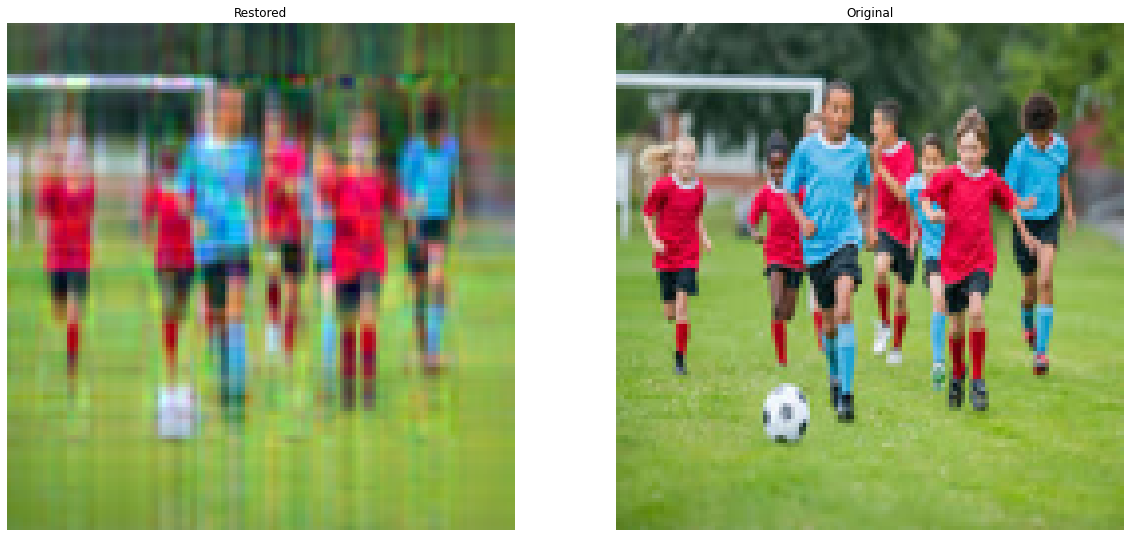

In [ ]:
fig = plt.figure(figsize=(20, 15))

# setting values to rows and column variables
rows = 1
columns = 2


# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(X_restored1)
plt.axis('off')
plt.title("Restored")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(X)
plt.axis('off')
plt.title("Original")

plt.show()


In [ ]:
input_img__1 = keras.Input(shape=(128, 128, 3))
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img__1)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D()(x)

encoded__1 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)


# at this point the representation is (8*8*128) i.e. 128-dimensional



x = layers.Conv2DTranspose(128,3, strides=(2,2), padding="same",activation="relu")(encoded__1)
x = layers.Conv2DTranspose(128,3, strides=(2,2), padding="same",activation="relu")(x)
x = layers.Conv2DTranspose(128,3, strides=(2,2), padding="same",activation="relu")(x)
x = layers.Conv2DTranspose(64,3, strides=(2,2), padding="same",activation="relu")(x)
decoded__1 = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder__1 = keras.Model(input_img__1, decoded__1)


autoencoder__1.compile(optimizer='adam', loss='mse')
autoencoder__1.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_35 (Conv2D)          (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 32, 32, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 32, 32, 128)       147

In [ ]:

autoencoder__1.fit(train, train, epochs=100, validation_data=(test, test))

Epoch 1/100
7/7 [==============================] - 2s 130ms/step - loss: 0.1015 - val_loss: 0.1085
Epoch 2/100
7/7 [==============================] - 1s 93ms/step - loss: 0.0975 - val_loss: 0.1319
Epoch 3/100
7/7 [==============================] - 1s 95ms/step - loss: 0.0883 - val_loss: 0.1122
Epoch 4/100
7/7 [==============================] - 1s 96ms/step - loss: 0.0853 - val_loss: 0.1179
Epoch 5/100
7/7 [==============================] - 1s 94ms/step - loss: 0.0632 - val_loss: 0.0787
Epoch 6/100
7/7 [==============================] - 1s 94ms/step - loss: 0.0429 - val_loss: 0.0475
Epoch 7/100
7/7 [==============================] - 1s 95ms/step - loss: 0.0335 - val_loss: 0.0516
Epoch 8/100
7/7 [==============================] - 1s 95ms/step - loss: 0.0280 - val_loss: 0.0354
Epoch 9/100
7/7 [==============================] - 1s 95ms/step - loss: 0.0255 - val_loss: 0.0387
Epoch 10/100
7/7 [==============================] - 1s 95ms/step - loss: 0.0241 - val_loss: 0.0314
Epoch 11/100
7/7 [

In [ ]:
decoded_imgs1 = autoencoder__1.predict(test)

1/1 [==============================] - 0s 122ms/step


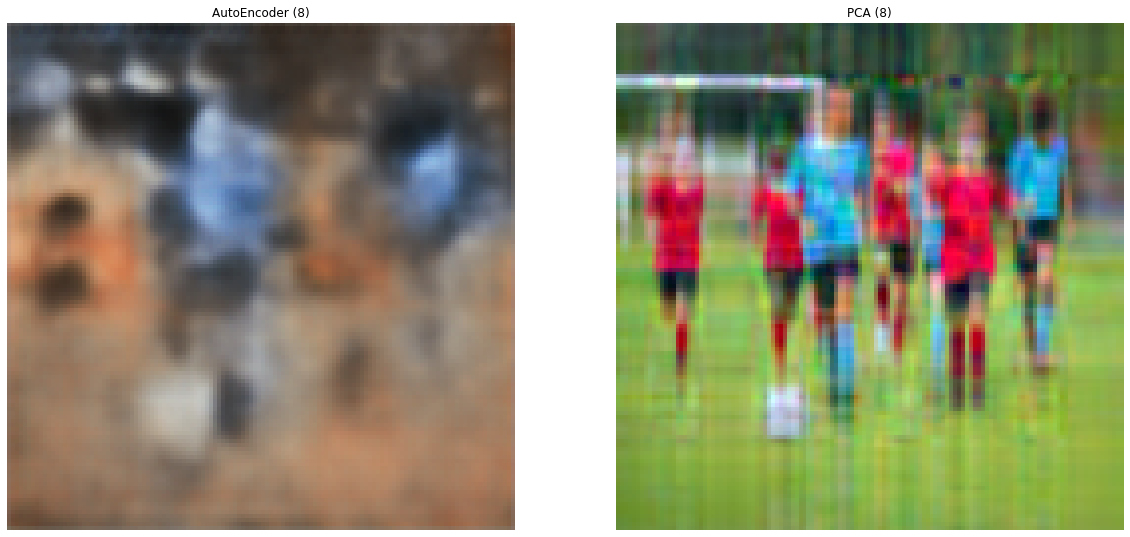

In [ ]:
fig = plt.figure(figsize=(20, 15))

# setting values to rows and column variables
rows = 1
columns = 2


# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(decoded_imgs1[3])
plt.axis('off')
plt.title("AutoEncoder (8)")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(X_restored1)
plt.axis('off')
plt.title("PCA (8)")

plt.show()


##**Encoding (16)**

In [ ]:
n_components = 16 #you can select any number of components.
eigenvector_subset1 = sorted_eigenvectors1[:,0:n_components]
eigenvector_subset2 = sorted_eigenvectors2[:,0:n_components]
eigenvector_subset3 = sorted_eigenvectors3[:,0:n_components]

In [ ]:
X_reduced1 = np.dot(eigenvector_subset1.transpose(),X_meaned1.transpose()).transpose()
X_reduced2 = np.dot(eigenvector_subset2.transpose(),X_meaned2.transpose()).transpose()
X_reduced3 = np.dot(eigenvector_subset3.transpose(),X_meaned3.transpose()).transpose()


**Restore The Image**

In [ ]:
X1_restored = np.dot(X_reduced1, eigenvector_subset1.T) + np.mean(X1 , axis = 0)
X2_restored = np.dot(X_reduced2, eigenvector_subset2.T) + np.mean(X2 , axis = 0)
X3_restored = np.dot(X_reduced3, eigenvector_subset3.T) + np.mean(X3 , axis = 0)

In [ ]:
X_restored2 = cv2.merge([X1_restored, X2_restored, X3_restored])

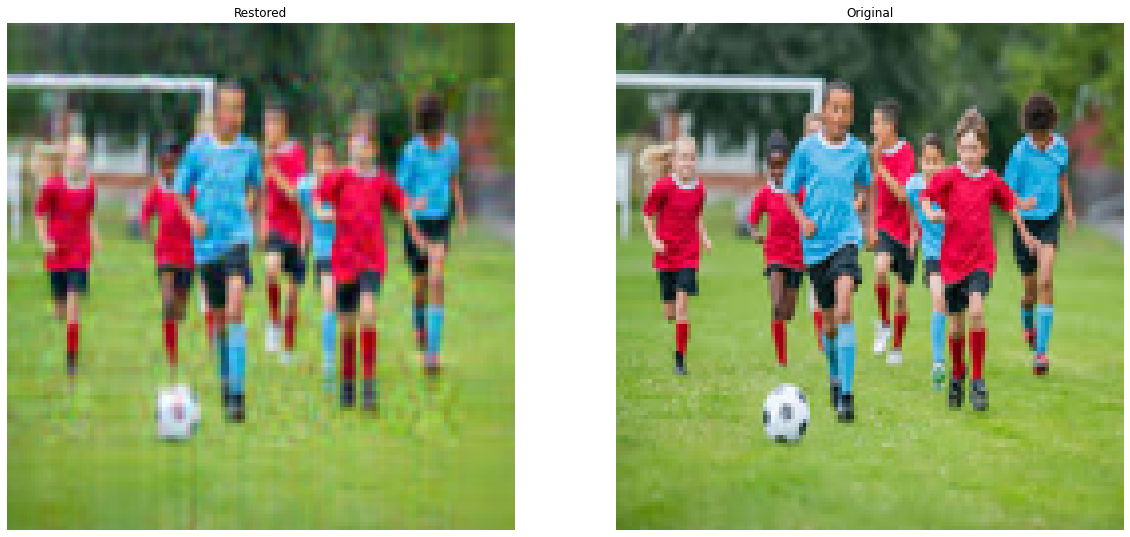

In [ ]:
fig = plt.figure(figsize=(20, 15))

# setting values to rows and column variables
rows = 1
columns = 2


# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(X_restored2)
plt.axis('off')
plt.title("Restored")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(X)
plt.axis('off')
plt.title("Original")

plt.show()


In [ ]:
input_img__2 = keras.Input(shape=(128, 128, 3))
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img__2)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D()(x)

encoded__2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)


# at this point the representation is (16) i.e. 128-dimensional



x = layers.Conv2DTranspose(128,3, strides=(2,2), padding="same",activation="relu")(encoded__2)
x = layers.Conv2DTranspose(128,3, strides=(2,2), padding="same",activation="relu")(x)
x = layers.Conv2DTranspose(64,3, strides=(2,2), padding="same",activation="relu")(x)
decoded__2 = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder__2 = keras.Model(input_img__2, decoded__2)


autoencoder__2.compile(optimizer='adam', loss='mse')
autoencoder__2.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_41 (Conv2D)          (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 32, 32, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 32, 32, 128)       147

In [ ]:
history = autoencoder__2.fit(train, train, epochs=100, validation_data=(test, test))

Epoch 1/100
7/7 [==============================] - 1s 122ms/step - loss: 0.1009 - val_loss: 0.1439
Epoch 2/100
7/7 [==============================] - 1s 96ms/step - loss: 0.0938 - val_loss: 0.1513
Epoch 3/100
7/7 [==============================] - 1s 97ms/step - loss: 0.0705 - val_loss: 0.1026
Epoch 4/100
7/7 [==============================] - 1s 96ms/step - loss: 0.0568 - val_loss: 0.0871
Epoch 5/100
7/7 [==============================] - 1s 110ms/step - loss: 0.0459 - val_loss: 0.0632
Epoch 6/100
7/7 [==============================] - 1s 103ms/step - loss: 0.0315 - val_loss: 0.0367
Epoch 7/100
7/7 [==============================] - 1s 113ms/step - loss: 0.0238 - val_loss: 0.0328
Epoch 8/100
7/7 [==============================] - 1s 99ms/step - loss: 0.0191 - val_loss: 0.0352
Epoch 9/100
7/7 [==============================] - 1s 97ms/step - loss: 0.0171 - val_loss: 0.0268
Epoch 10/100
7/7 [==============================] - 1s 98ms/step - loss: 0.0152 - val_loss: 0.0259
Epoch 11/100
7/

In [ ]:
decoded_imgs2 = autoencoder__2.predict(test)

1/1 [==============================] - 0s 102ms/step


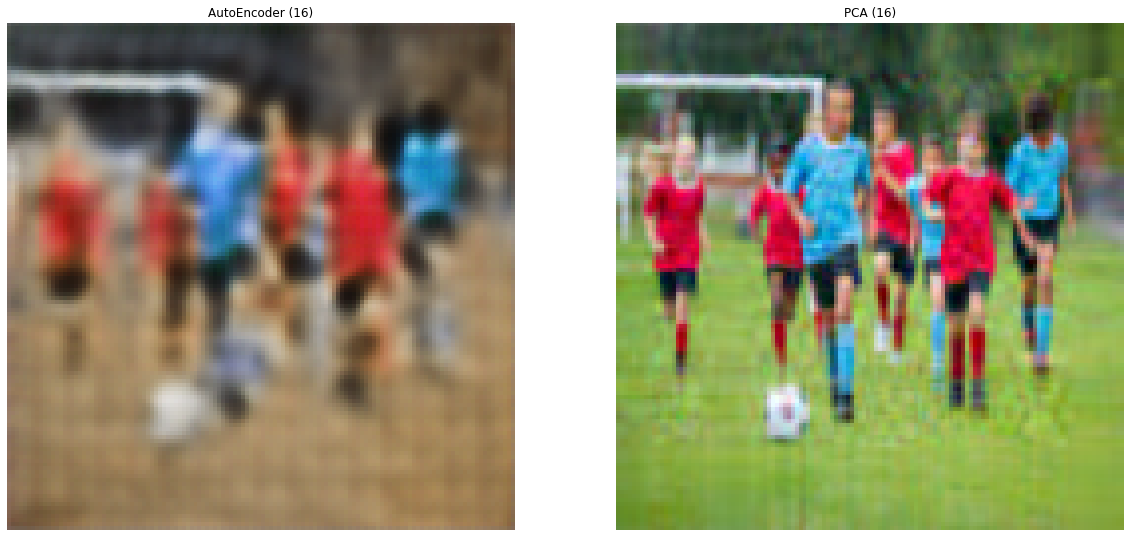

In [ ]:
fig = plt.figure(figsize=(20, 15))

# setting values to rows and column variables
rows = 1
columns = 2


# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(decoded_imgs2[3])
plt.axis('off')
plt.title("AutoEncoder (16)")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(X_restored2)
plt.axis('off')
plt.title("PCA (16)")

plt.show()


##**Encoding (32)**

In [ ]:
n_components = 32 #you can select any number of components.
eigenvector_subset1 = sorted_eigenvectors1[:,0:n_components]
eigenvector_subset2 = sorted_eigenvectors2[:,0:n_components]
eigenvector_subset3 = sorted_eigenvectors3[:,0:n_components]

In [ ]:
X_reduced1 = np.dot(eigenvector_subset1.transpose(),X_meaned1.transpose()).transpose()
X_reduced2 = np.dot(eigenvector_subset2.transpose(),X_meaned2.transpose()).transpose()
X_reduced3 = np.dot(eigenvector_subset3.transpose(),X_meaned3.transpose()).transpose()


**Restore The Image**

In [ ]:
X1_restored = np.dot(X_reduced1, eigenvector_subset1.T) + np.mean(X1 , axis = 0)
X2_restored = np.dot(X_reduced2, eigenvector_subset2.T) + np.mean(X2 , axis = 0)
X3_restored = np.dot(X_reduced3, eigenvector_subset3.T) + np.mean(X3 , axis = 0)

In [ ]:
X_restored3 = cv2.merge([X1_restored, X2_restored, X3_restored])

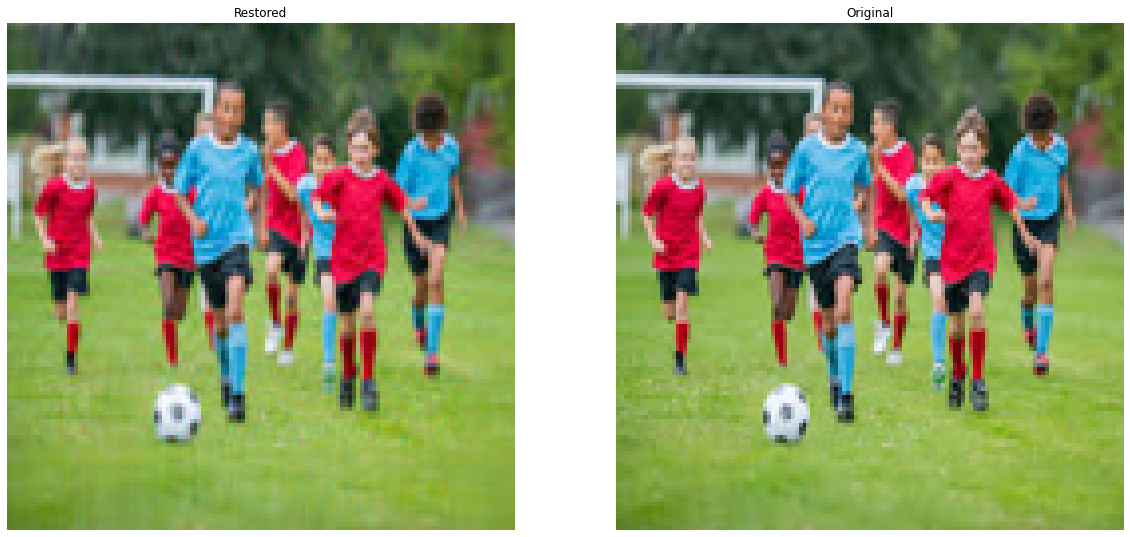

In [ ]:
fig = plt.figure(figsize=(20, 15))

# setting values to rows and column variables
rows = 1
columns = 2


# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(X_restored3)
plt.axis('off')
plt.title("Restored")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(X)
plt.axis('off')
plt.title("Original")

plt.show()


In [ ]:
input_img__3 = keras.Input(shape=(128, 128, 3))
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img__3)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D()(x)

encoded__3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)


# at this point the representation is (64*64*256) i.e. 128-dimensional

x = layers.Conv2DTranspose(128,3, strides=(2,2), padding="same",activation="relu")(encoded__3)
x = layers.Conv2DTranspose(64,3, strides=(2,2), padding="same",activation="relu")(x)
decoded__3= layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder__3 = keras.Model(input_img__3, decoded__3)


autoencoder__3.compile(optimizer='adam', loss='mse')
autoencoder__3.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_46 (Conv2D)          (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 32, 32, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_48 (Conv2D)          (None, 32, 32, 128)       147

In [ ]:
autoencoder__3.fit(train, train, epochs=100, validation_data=(test, test))

Epoch 1/100
7/7 [==============================] - 1s 115ms/step - loss: 0.0997 - val_loss: 0.0747
Epoch 2/100
7/7 [==============================] - 1s 94ms/step - loss: 0.0761 - val_loss: 0.0456
Epoch 3/100
7/7 [==============================] - 1s 94ms/step - loss: 0.0422 - val_loss: 0.0361
Epoch 4/100
7/7 [==============================] - 1s 94ms/step - loss: 0.0279 - val_loss: 0.0383
Epoch 5/100
7/7 [==============================] - 1s 94ms/step - loss: 0.0232 - val_loss: 0.0329
Epoch 6/100
7/7 [==============================] - 1s 94ms/step - loss: 0.0175 - val_loss: 0.0250
Epoch 7/100
7/7 [==============================] - 1s 94ms/step - loss: 0.0145 - val_loss: 0.0210
Epoch 8/100
7/7 [==============================] - 1s 95ms/step - loss: 0.0122 - val_loss: 0.0248
Epoch 9/100
7/7 [==============================] - 1s 94ms/step - loss: 0.0117 - val_loss: 0.0195
Epoch 10/100
7/7 [==============================] - 1s 95ms/step - loss: 0.0116 - val_loss: 0.0229
Epoch 11/100
7/7 [

In [ ]:
decoded_imgs3 = autoencoder__3.predict(test)

1/1 [==============================] - 0s 88ms/step


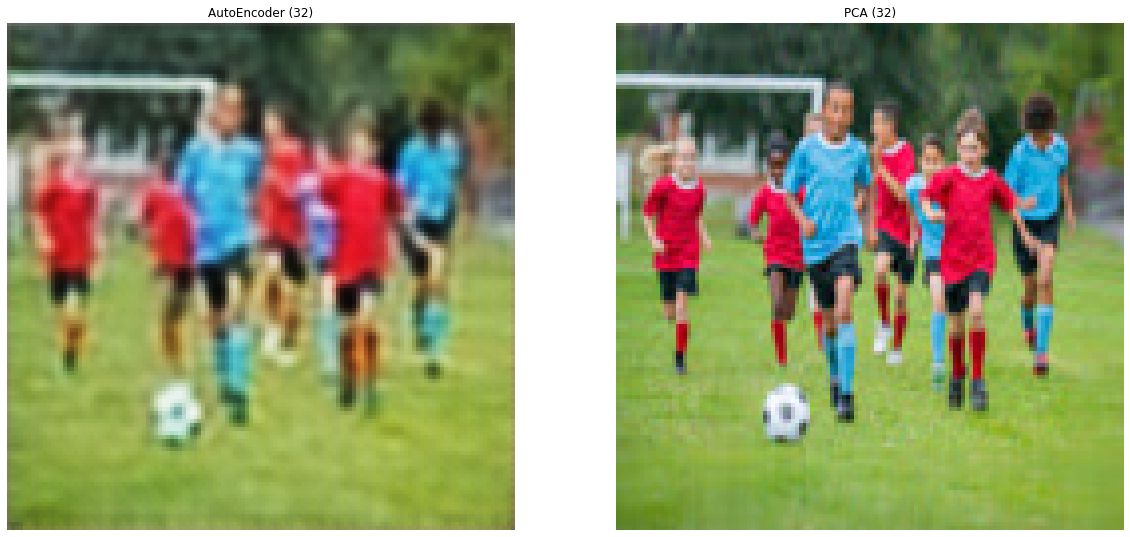

In [ ]:
fig = plt.figure(figsize=(20, 15))

# setting values to rows and column variables
rows = 1
columns = 2


# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(decoded_imgs3[3])
plt.axis('off')
plt.title("AutoEncoder (32)")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(X_restored3)
plt.axis('off')
plt.title("PCA (32)")

plt.show()


##**Encoding (64)**

In [ ]:
n_components = 64 #you can select any number of components.
eigenvector_subset1 = sorted_eigenvectors1[:,0:n_components]
eigenvector_subset2 = sorted_eigenvectors2[:,0:n_components]
eigenvector_subset3 = sorted_eigenvectors3[:,0:n_components]

In [ ]:
X_reduced1 = np.dot(eigenvector_subset1.transpose(),X_meaned1.transpose()).transpose()
X_reduced2 = np.dot(eigenvector_subset2.transpose(),X_meaned2.transpose()).transpose()
X_reduced3 = np.dot(eigenvector_subset3.transpose(),X_meaned3.transpose()).transpose()


**Restore The Image**

In [ ]:
X1_restored = np.dot(X_reduced1, eigenvector_subset1.T) + np.mean(X1 , axis = 0)
X2_restored = np.dot(X_reduced2, eigenvector_subset2.T) + np.mean(X2 , axis = 0)
X3_restored = np.dot(X_reduced3, eigenvector_subset3.T) + np.mean(X3 , axis = 0)

In [ ]:
X_restored4 = cv2.merge([X1_restored, X2_restored, X3_restored])

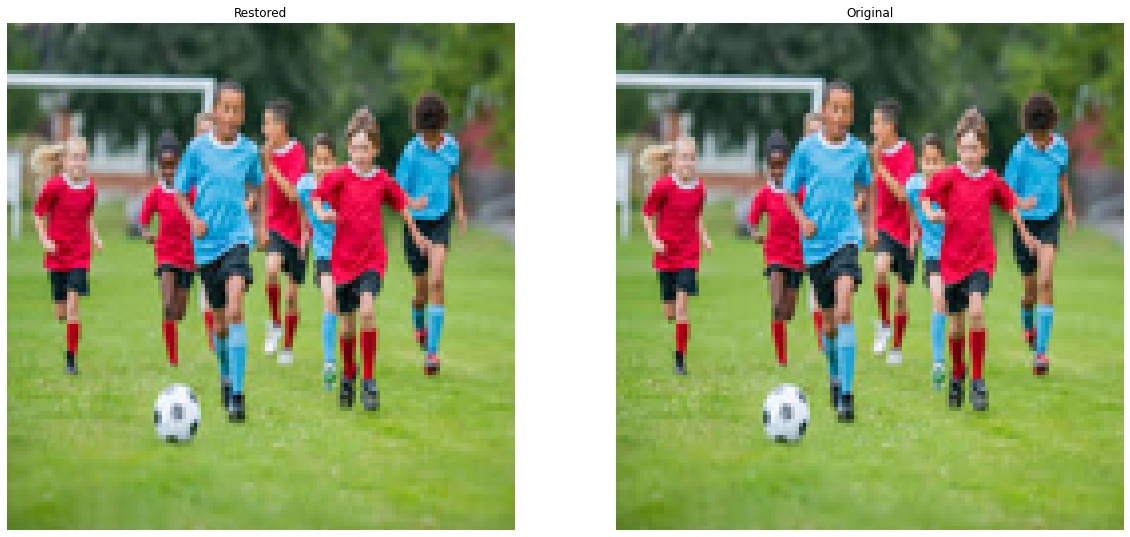

In [ ]:
fig = plt.figure(figsize=(20, 15))

# setting values to rows and column variables
rows = 1
columns = 2


# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(X_restored4)
plt.axis('off')
plt.title("Restored")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(X)
plt.axis('off')
plt.title("Original")

plt.show()


In [ ]:
input_img__4 = keras.Input(shape=(128, 128, 3))
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img__4)
x = layers.MaxPooling2D()(x)

encoded__4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)


# at this point the representation is (64*64*128) i.e. 128-dimensional

x = layers.Conv2DTranspose(64,3, strides=(2,2), padding="same",activation="relu")(encoded__4)
decoded__4= layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder__4 = keras.Model(input_img__4, decoded__4)


autoencoder__4.compile(optimizer='adam', loss='mse')
autoencoder__4.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_50 (Conv2D)          (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 64, 64, 128)       73856     
                                                                 
 conv2d_transpose_31 (Conv2D  (None, 128, 128, 64)     73792     
 Transpose)                                                      
                                                                 
 conv2d_52 (Conv2D)          (None, 128, 128, 3)       173

In [ ]:
autoencoder__4.fit(train, train, epochs=100, validation_data=(test, test))

Epoch 1/100
7/7 [==============================] - 1s 92ms/step - loss: 0.0978 - val_loss: 0.0699
Epoch 2/100
7/7 [==============================] - 1s 77ms/step - loss: 0.0856 - val_loss: 0.0479
Epoch 3/100
7/7 [==============================] - 1s 76ms/step - loss: 0.0599 - val_loss: 0.0266
Epoch 4/100
7/7 [==============================] - 1s 74ms/step - loss: 0.0273 - val_loss: 0.0630
Epoch 5/100
7/7 [==============================] - 1s 74ms/step - loss: 0.0223 - val_loss: 0.0202
Epoch 6/100
7/7 [==============================] - 1s 75ms/step - loss: 0.0135 - val_loss: 0.0161
Epoch 7/100
7/7 [==============================] - 1s 75ms/step - loss: 0.0095 - val_loss: 0.0166
Epoch 8/100
7/7 [==============================] - 1s 75ms/step - loss: 0.0070 - val_loss: 0.0166
Epoch 9/100
7/7 [==============================] - 1s 75ms/step - loss: 0.0060 - val_loss: 0.0117
Epoch 10/100
7/7 [==============================] - 1s 75ms/step - loss: 0.0048 - val_loss: 0.0110
Epoch 11/100
7/7 [=

In [ ]:
decoded_imgs4 = autoencoder__4.predict(test)

1/1 [==============================] - 0s 63ms/step


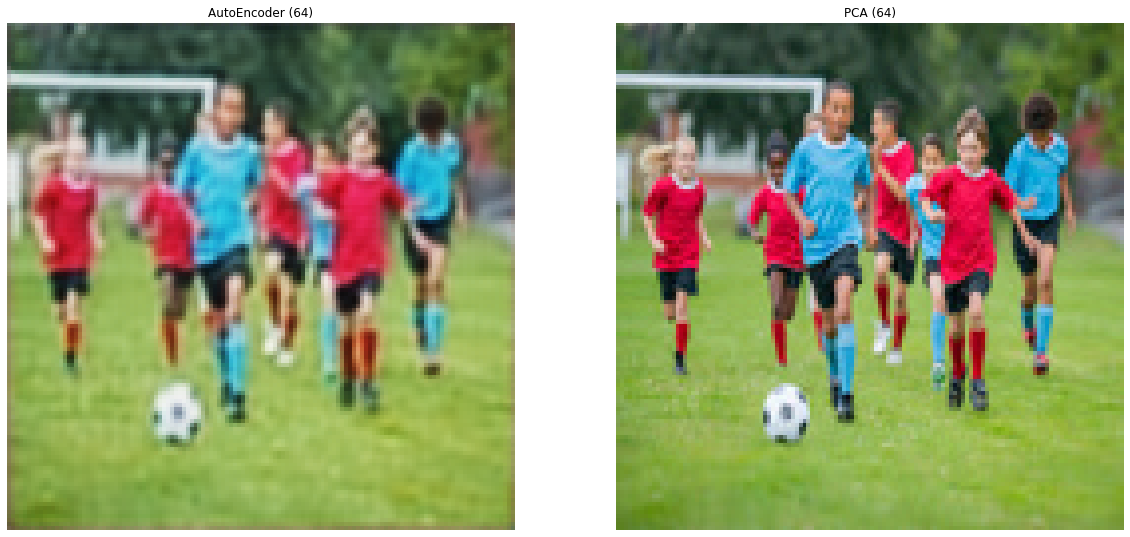

In [ ]:
fig = plt.figure(figsize=(20, 15))

# setting values to rows and column variables
rows = 1
columns = 2


# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(decoded_imgs4[3])
plt.axis('off')
plt.title("AutoEncoder (64)")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(X_restored4)
plt.axis('off')
plt.title("PCA (64)")

plt.show()
